In [1]:
import poseidon_core
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = '/home/rmccune/Documents/poseidon/data/lidar/combined_point_cloud_down_east.laz'

min_x_extent = 847809.694
max_x_extent = 847973.874
min_y_extent = 127254.634
max_y_extent = 127450.141

grid_gen = poseidon_core.GridGenerator(file_path, min_x_extent, max_x_extent, min_y_extent, max_y_extent, lidar_units='meters')

resolution = 0.05 # meters

pts_array = grid_gen.create_point_array()
grid_x, grid_y, grid_z = grid_gen.gen_grid(resolution, pts_array, grid_descriptor='sea_level')


--- Starting grid generation for 'sea_level' at 0.05m ---
  [IO] Using existing directory: data/generated_grids
  [GRID] Generating grid coordinates...
    X Extent: 847809.69 to 847973.87
    Y Extent: 127254.63 to 127450.14
    Initial grid shape (before transpose): (3284, 3911)
  [GRID] Interpolating Z grid from 205550 input points...
    [WARN] 8834 grid points were outside the interpolation area (set to NaN).
  [GRID] Transposing grids to (Y, X) convention.
    Final grid shape: (3911, 3284)
  [IO] Saving compressed Zarr arrays (mode='w', overwriting)...
    X -> data/generated_grids/sea_level_grid_x_0.05m.zarr
    Y -> data/generated_grids/sea_level_grid_y_0.05m.zarr
    Z -> data/generated_grids/sea_level_grid_z_0.05m.zarr
--- Grid generation successful in 5.24 seconds. ---


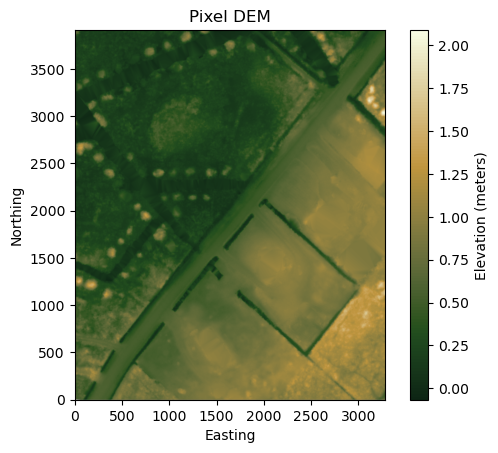

In [3]:
poseidon_core.plotting_utils.plot_elev_grid(grid_z)

In [4]:
intrinsics = np.array([3040, # number of pixel columns
                       4056, # number of pixel rows
                       1503.0136, # U component of principal point
                       2163.4301, # V component of principal point
                       2330.4972, # U component of focal length
                       2334.0017, # V component of focal length
                       -0.3587, # radial distortion 
                       0.1388, # radial distortion
                       -0.0266, # radial distortion
                       -0.0046, # tangential distortion
                       0.0003 # tangential distortion
                       ])

extrinsics = np.array([847955.4296, # camera x in world
                       127408.728, # camera y in world
                       4.4922, # camera elev in world
                       4.38504, # azimuth
                       1.14484, # tilt
                       0.01305 # roll/swing
                       ])

In [5]:
rectifier = poseidon_core.ImageRectifier(intrinsics, extrinsics, grid_x, grid_y, grid_z, use_gpu=True)

[2025-10-24 16:00:24] --- Initializing ImageRectifier ---
[2025-10-24 16:00:24]   Mode: GPU (CuPy)
[2025-10-24 16:00:24]   Input grid shape: (3911, 3284)
[2025-10-24 16:00:24]   Starting distortion map computation (Ud, Vd)...
[2025-10-24 16:00:25]   ...Distortion map computation complete.
[2025-10-24 16:00:25] --- ImageRectifier Initialization Complete ---


In [6]:
rect_im = rectifier.merge_rectify('data/CAM_DE_01_20241020151826.jpg', verbose=True)

[2025-10-24 16:00:39] Rectifying single image: data/CAM_DE_01_20241020151826.jpg


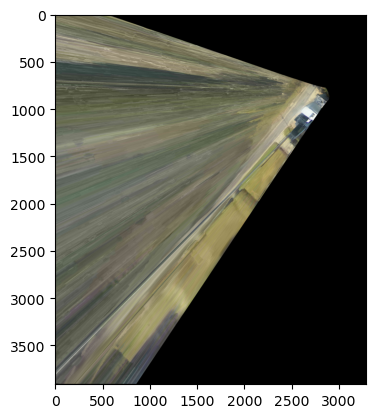

In [7]:
plt.imshow(np.flipud(rect_im.get()))

In [9]:
rectifier.merge_rectify_folder('data/DE_test_event/orig_images', 'data/DE_test_event/zarr/orig_rects')

[2025-10-24 16:02:30] 
=== Starting Batch Rectification ===
[2025-10-24 16:02:30]   Source folder: data/DE_test_event/orig_images
[2025-10-24 16:02:30]   Output Zarr store: data/DE_test_event/zarr/orig_rects
[2025-10-24 16:02:30]   Found 60 images to process.
[2025-10-24 16:02:30]   Processing image 1/60: CAM_DE_01_20241005125426.jpg
[2025-10-24 16:02:32]   Processing image 6/60: CAM_DE_01_20241005121826.jpg
[2025-10-24 16:02:35]   Processing image 12/60: CAM_DE_01_20241005113626.jpg
[2025-10-24 16:02:37]   Processing image 18/60: CAM_DE_01_20241005114226.jpg
[2025-10-24 16:02:40]   Processing image 24/60: CAM_DE_01_20241005205426.jpg
[2025-10-24 16:02:43]   Processing image 30/60: CAM_DE_01_20241005200625.jpg
[2025-10-24 16:02:45]   Processing image 36/60: CAM_DE_01_20241005182426.jpg
[2025-10-24 16:02:48]   Processing image 42/60: CAM_DE_01_20241005123626.jpg
[2025-10-24 16:02:50]   Processing image 48/60: CAM_DE_01_20241005192426.jpg
[2025-10-24 16:02:53]   Processing image 54/60: C